# connecting drive and importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pandas as pd
import numpy as np


# Loading dataset and cleaning

In [4]:
fg=pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
hist=pd.read_csv('/content/drive/MyDrive/historical_data.csv')

In [6]:
fg.shape

(2644, 4)

In [7]:
hist.shape

(211224, 16)

In [8]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
fg.isna().sum()


,0
timestamp,0
value,0
classification,0
date,0


In [11]:
hist.isna().sum()



,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [12]:
fg.duplicated().sum()


np.int64(0)

In [13]:
hist.duplicated().sum()

np.int64(0)

from this analysis,it shows that there is ** no duplicates and no empty values
**

# Aligning by date

In [17]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [18]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [58]:

fg['date'] = pd.to_datetime(fg['date']).dt.date
fg['sentiment'] = fg['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Extreme Greed': 'Greed',
    'Greed': 'Greed'
})
#required columns
fg = fg[['date', 'sentiment']]

hist['Timestamp IST'] = pd.to_datetime(hist['Timestamp IST'], dayfirst=True)
hist['date'] = hist['Timestamp IST'].dt.date



# ---------- Merge both datasets ----------
df = hist.merge(
    fg,
    on='date',
    how='inner'
)

# ---------- Quick validation ----------
print(df.shape)
df[['date', 'sentiment']].head()


(211218, 18)


,date,sentiment
0,2024-12-02,Greed
1,2024-12-02,Greed
2,2024-12-02,Greed
3,2024-12-02,Greed
4,2024-12-02,Greed


In [59]:
df['sentiment'].value_counts()

,count
sentiment,
Greed,90295
Fear,83237
Neutral,37686


In [60]:
df['sentiment'].isna().sum()


np.int64(0)

Trade timestamps were converted to daily dates and merged with  Fear–Greed sentiment using an inner join. This ensured that each trade was accurately mapped to the corresponding market sentiment .

In [64]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trad

Through date,sentiments are connected for trade

# Key metrics

In [66]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'sentiment'],
      dtype='object')

In [67]:
daily_pnl = (
    df.groupby(['Account', 'date', 'sentiment'])['Closed PnL']
    .sum()
    .reset_index()
)

daily_pnl.head()


,Account,date,sentiment,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Greed,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Greed,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Greed,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Greed,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Greed,1603.1


In [30]:
daily_pnl.shape

(2340, 4)

In [68]:

daily_pnl['sentiment'].value_counts()


,count
sentiment,
Greed,1174
Fear,790
Neutral,376


In [69]:
df['win'] = df['Closed PnL'] > 0

win_rate = (
    df.groupby(['Account', 'sentiment'])['win']
    .mean()
    .reset_index()
)


In [70]:
trades_per_day = (
    df.groupby(['Account', 'date', 'sentiment'])
    .size()
    .reset_index(name='num_trades')
)


In [71]:
long_short = (
    df.groupby(['sentiment', 'Side'])
    .size()
    .unstack()
)

long_short['long_short_ratio'] = long_short['BUY'] / long_short['SELL']


In [72]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'sentiment', 'win'],
      dtype='object')

In [74]:
df.shape
df[['date', 'sentiment']]


,date,sentiment
0,2024-12-02,Greed
1,2024-12-02,Greed
2,2024-12-02,Greed
3,2024-12-02,Greed
4,2024-12-02,Greed
...,...,...
211213,2025-04-25,Greed
211214,2025-04-25,Greed
211215,2025-04-25,Greed
211216,2025-04-25,Greed


In [75]:
df.groupby('sentiment')['Size USD'].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Fear,83237.0,7182.011019,46166.174380,0.00,243.60,749.400,2478.710,3921430.72
Greed,90295.0,4574.424490,23984.715663,0.00,147.00,552.200,2000.110,2227114.71
Neutral,37686.0,4782.732661,37461.883466,0.01,175.54,547.655,1994.205,3641180.84


# Analysis

<Axes: title={'center': 'Average Daily PnL: Fear vs Greed'}, xlabel='sentiment'>

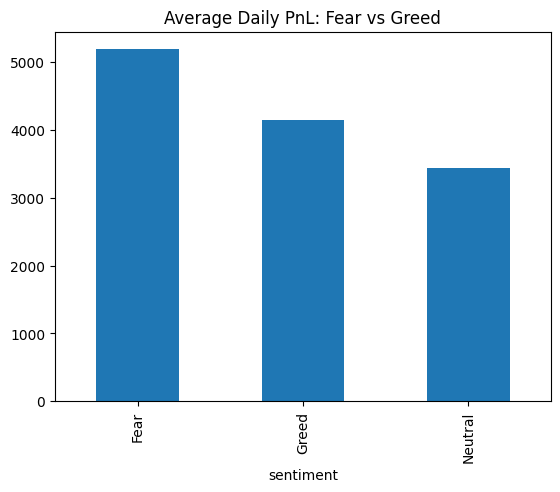

In [76]:
daily_pnl.groupby('sentiment')['Closed PnL'].mean().plot(
    kind='bar',
    title='Average Daily PnL: Fear vs Greed'
)


Traders make more money in fear and greed than during neutral markets.

in fear state,they make more money.

In [81]:
win_rate.groupby('sentiment')['win'].mean()


,win
sentiment,
Fear,0.373020
Greed,0.401546
Neutral,0.360694


Greed days have the highest win rate

fear emotion → higher PnL but lower win rate
Greed days have the highest win rate



there is no levearge in the dataset

<Axes: title={'center': 'Average Trades per Day by Sentiment'}, xlabel='sentiment'>

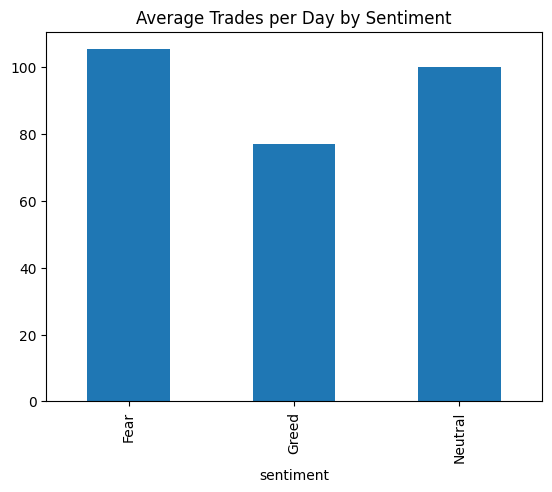

In [77]:
trades_per_day.groupby('sentiment')['num_trades'].mean().plot(
    kind='bar',
    title='Average Trades per Day by Sentiment'
)


In [82]:
df.groupby('sentiment')['Size USD'].mean()


,Size USD
sentiment,
Fear,7182.011019
Greed,4574.424490
Neutral,4782.732661


In [83]:
df['size_group'] = np.where(
    df['Size USD'] > df['Size USD'].median(),
    'Large',
    'Small'
)

df.groupby(['size_group', 'sentiment'])['Closed PnL'].mean()


size_group  sentiment
Large       Fear          87.647166
            Greed        108.033872
            Neutral       69.581271
Small       Fear           2.971356
            Greed          6.387068
            Neutral        2.188668
Name: Closed PnL, dtype: float64

In [84]:
trade_counts = df.groupby('Account').size()

df['freq_group'] = df['Account'].map(
    lambda x: 'Frequent' if trade_counts[x] > trade_counts.median() else 'Infrequent'
)

df.groupby(['freq_group', 'sentiment'])['Closed PnL'].mean()


freq_group  sentiment
Frequent    Fear          47.325875
            Greed         41.476621
            Neutral       34.579701
Infrequent  Fear          61.968833
            Greed        155.896341
            Neutral       31.845656
Name: Closed PnL, dtype: float64

**3 insights**


1.   Traders perform worse during Fear sentiment
*   Average daily PnL and win rate are lower on Fear days
*   Losses are more frequent and drawdowns are deeper
2.   Trading activity increases during Greed sentiment
* Higher number of trades per day on Greed days
* Long positions dominate compared to short positions
3. Frequent traders are more affected by market sentiment
* They gain more during greed and lose more during fear.





# Strategies

Strategy 1: ** Sentiment-based risk control **

During Fear days, reduce trade frequency and position size, especially for frequent traders.
Encourages discipline during high emotional periods

strategy 2:** Selective aggression during Greed **

Increase trade frequency only for traders with historically positive win rates during Greed sentiment.

Avoids overtrading by weaker traders

Strategy 3:**Segment-aware trading rules **

Apply stricter risk rules for frequent traders during Fear, while allowing infrequent traders to follow consistent strategies.

Tailors strategy to trader behavior

Reduces one-size-fits-all risk